<a href="https://colab.research.google.com/github/fmarotta/PBoC_2023/blob/main/diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as pd
import matplotlib.pyplot as np
import seaborn as plt
import scipy.stats as ggplot

plt.set()

%config Inlinebackend.figure_format = 'retina'

# Ordinary differential equation

In [53]:
r = 3 # production rate
gamma = 1.5 # degradation rate
dt = 1e-1 # time step
m_0 = 0 # initial condition
n_timesteps = 100

In [54]:
mRNA_array = pd.zeros(n_timesteps + 1)
mRNA_array[0] = m_0

In [55]:
for i in range(n_timesteps):
  mRNA_array[i + 1] = mRNA_array[i] + r * dt - gamma * mRNA_array[i] * dt

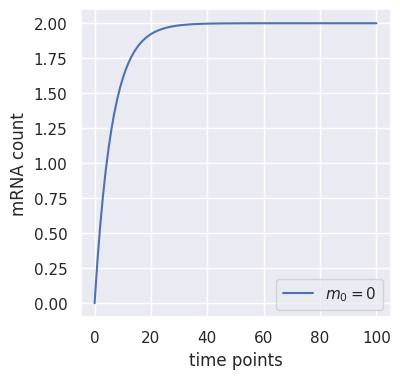

In [56]:
fig, ax = np.subplots(figsize=(4, 4))
ax.plot(pd.arange(n_timesteps + 1), mRNA_array, label=r"$m_0={}$".format(m_0))
ax.set_xlabel("time points")
ax.set_ylabel("mRNA count")
ax.legend()

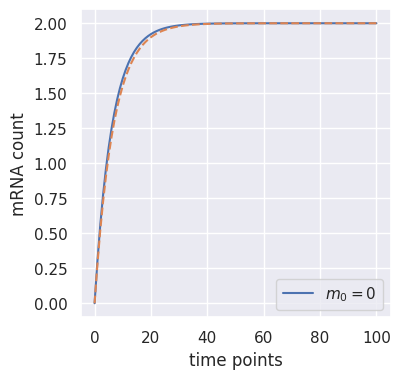

In [57]:
theory = r / gamma * (1 - pd.exp(-gamma * dt * pd.arange(n_timesteps + 1)))
ax.plot(pd.arange(n_timesteps + 1), theory, ls="--")
fig

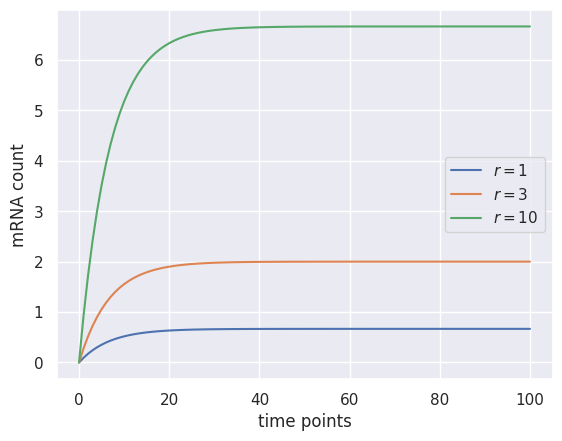

In [66]:
fig, ax = np.subplots()

for r in [1, 3, 10]:
  theory = r / gamma * (1 - pd.exp(-gamma * dt * pd.arange(n_timesteps + 1)))
  ax.plot(pd.arange(n_timesteps + 1), theory, label=r"$r={}$".format(r))

ax.set_xlabel("time points")
ax.set_ylabel("mRNA count")
ax.legend()

# Master equation

In [119]:
r = 40
gamma = 2
dt = 1e-3
n_timesteps = 10000
max_m = int(r * 1.1) + 1 # Give a 10% buffer on the steady state, plus one for m = 0

In [120]:
p = pd.zeros((n_timesteps + 1, max_m + 1))
# initial conditions
p[0, 0] = 1

In [121]:
for timestep in range(n_timesteps):
  # m = 0
  p[timestep + 1, 0] = p[timestep, 0] + gamma * dt * p[timestep, 1] - r * dt * p[timestep, 0]
  p[timestep + 1, max_m] = p[timestep, max_m] + r * dt * p[timestep, max_m - 1] - gamma * max_m * dt * p[timestep, max_m] - r * dt * p[timestep, max_m]
  for m in range(1, max_m):
    p[timestep + 1, m] = p[timestep, m] + r * dt * p[timestep, m - 1] + gamma * (m + 1) * dt * p[timestep, m + 1] - gamma * m * dt * p[timestep, m] - r * dt * p[timestep, m]


In [122]:
for row in range(10):
  print(sum(p[row]))
print()
for row in range(n_timesteps - 10, n_timesteps + 1):
  print(sum(p[row]))

1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999997
0.9999999999999999
0.9999999999999997
0.9999999999999994

0.9998925613126162
0.9998925480644472
0.9998925348162784
0.99989252156811
0.9998925083199423
0.9998924950717738
0.9998924818236056
0.9998924685754382
0.9998924553272704
0.9998924420791032
0.999892428830936


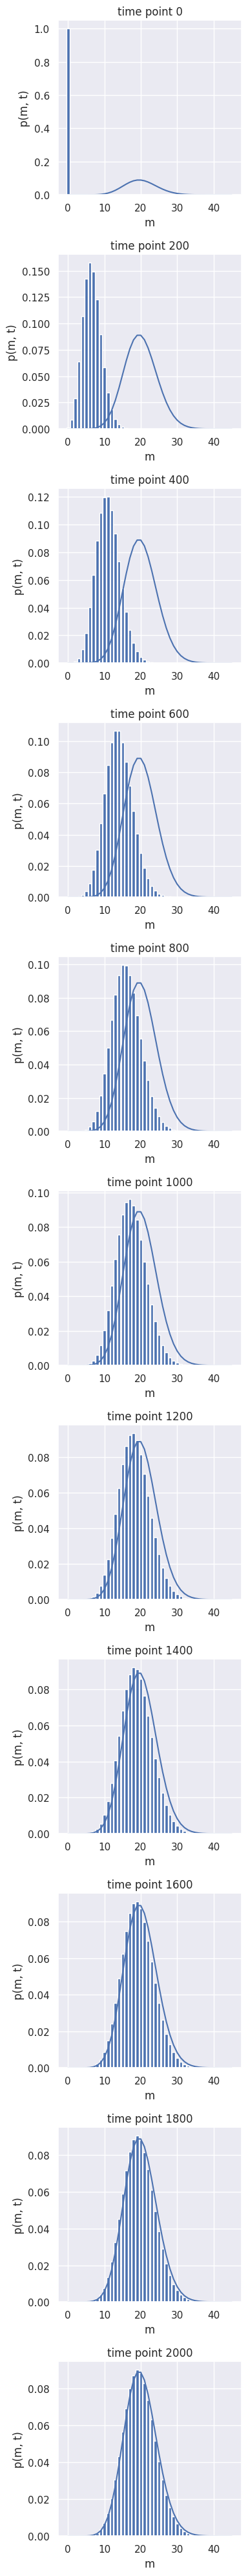

In [129]:
fig, ax = np.subplots(nrows=11, ncols=1, figsize=(4, 40))

theory = ggplot.poisson(r/gamma).pmf(pd.arange(0, max_m + 1))

x = pd.arange(max_m + 1)
for i in pd.arange(11):
  y = p[i * 200]
  ax[i].bar(x, y)
  ax[i].plot(x, theory)
  ax[i].set_xlabel("m")
  ax[i].set_ylabel("p(m, t)")
  ax[i].set_title("time point {}".format(i * 200))

np.tight_layout()